# Jonathan Halverson
# Thursday, April 6, 2017
# Part14: Preparing the feature matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')
from scipy.stats import binom, norm

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)

In [2]:
iofile = 'data/ufc_champions.csv'
champs = pd.read_csv(iofile, header=0, parse_dates=['Date'])
champs = champs.set_index('Name')
champs.head(3)

,Date
Name,
Amanda Nunes,2016-07-12
Anderson Silva,2006-10-17
Andrei Arlovski,2005-02-08


In [3]:
iofile = 'data/fightmetric_individual_fights/detailed_stats_individual_fights_FINAL.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
fights.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Knockdowns,SigStrikesLanded,SigStrikesAttempted,TotStrikesLanded,TotStrikesAttempted,TakedownLanded,TakedownAttempted,SubsAttempted,Pass,Reversal,Knockdowns_L,SigStrikesLanded_L,SigStrikesAttempted_L,TotStrikesLanded_L,TotStrikesAttempted_L,TakedownLanded_L,TakedownAttempted_L,SubsAttempted_L,Pass_L,Reversal_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",0.0,80.0,150.0,144.0,223.0,0.0,1.0,0.0,0.0,0.0,0.0,77.0,182.0,122.0,235.0,0.0,9.0,0.0,0.0,0.0
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",0.0,43.0,78.0,54.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,101.0,118.0,184.0,2.0,10.0,0.0,0.0,0.0
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",0.0,7.0,18.0,15.0,30.0,1.0,2.0,1.0,2.0,0.0,0.0,6.0,10.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0


In [4]:
fights.shape

(4042, 31)

In [5]:
ftr = 'Ovince Saint Preux'
fights[(fights.Winner == ftr) | (fights.Loser == ftr)]

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Knockdowns,SigStrikesLanded,SigStrikesAttempted,TotStrikesLanded,TotStrikesAttempted,TakedownLanded,TakedownAttempted,SubsAttempted,Pass,Reversal,Knockdowns_L,SigStrikesLanded_L,SigStrikesAttempted_L,TotStrikesLanded_L,TotStrikesAttempted_L,TakedownLanded_L,TakedownAttempted_L,SubsAttempted_L,Pass_L,Reversal_L
13,Volkan Oezdemir,def.,Ovince Saint Preux,Light Heavyweight,S-DEC,NaN,3,5:00,UFC Fight Night: Bermudez vs. The Korean Zombie,2017-02-04,"Houston, Texas, USA",0.0,82.0,182.0,103.0,204.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,189.0,79.0,192.0,0.0,4.0,0.0,0.0,0.0
169,Jimi Manuwa,def.,Ovince Saint Preux,Light Heavyweight,KO/TKO,Punch,2,2:38,UFC 204: Bisping vs. Henderson,2016-10-08,"Manchester, England, United Kingdom",1.0,32.0,47.0,33.0,48.0,0.0,3.0,1.0,0.0,0.0,0.0,13.0,38.0,17.0,44.0,2.0,3.0,0.0,2.0,0.0
403,Jon Jones,def.,Ovince Saint Preux,Light Heavyweight,U-DEC,NaN,5,5:00,UFC 197: Jones vs Saint Preux,2016-04-23,"Las Vegas, Nevada, USA",0.0,105.0,157.0,111.0,163.0,3.0,5.0,0.0,4.0,0.0,0.0,57.0,160.0,58.0,161.0,0.0,0.0,0.0,0.0,0.0
491,Ovince Saint Preux,def.,Rafael Feijao,Light Heavyweight,U-DEC,NaN,3,5:00,UFC Fight Night: Hendricks vs Thompson,2016-02-06,"Las Vegas, Nevada, USA",0.0,51.0,102.0,106.0,165.0,1.0,2.0,0.0,1.0,0.0,0.0,10.0,22.0,29.0,41.0,0.0,1.0,0.0,0.0,0.0
691,Glover Teixeira,def.,Ovince Saint Preux,Light Heavyweight,SUB,Rear Naked Choke,3,3:10,UFC Fight Night: Teixeira vs Saint Preux,2015-08-08,"Nashville, Tennessee, USA",0.0,53.0,79.0,128.0,162.0,5.0,9.0,1.0,11.0,0.0,0.0,30.0,54.0,36.0,61.0,0.0,3.0,0.0,2.0,1.0
882,Ovince Saint Preux,def.,Patrick Cummins,Light Heavyweight,KO/TKO,Punch,1,4:54,UFC Fight Night: Machida vs Rockhold,2015-04-18,"Newark, New Jersey, USA",1.0,18.0,41.0,18.0,41.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,23.0,15.0,27.0,1.0,3.0,0.0,0.0,0.0
1081,Ovince Saint Preux,def.,Mauricio Rua,Light Heavyweight,KO/TKO,Punch,1,0:34,UFC Fight Night 56: Shogun vs Saint Preux,2014-11-08,"Uberlandia, Minas Gerais, Brazil",1.0,9.0,15.0,9.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
1208,Ryan Bader,def.,Ovince Saint Preux,Light Heavyweight,U-DEC,NaN,5,5:00,UFC Fight Night: Bader vs Saint Preux,2014-08-16,"Bangor, Maine, USA",0.0,24.0,72.0,77.0,137.0,9.0,21.0,1.0,5.0,0.0,0.0,24.0,91.0,30.0,97.0,2.0,2.0,0.0,1.0,0.0
1297,Ovince Saint Preux,def.,Ryan Jimmo,Light Heavyweight,KO/TKO,NaN,2,2:10,UFC 174: Johnson vs Bagautinov,2014-06-14,"Vancouver, British Columbia, Canada",0.0,14.0,34.0,20.0,40.0,2.0,4.0,1.0,3.0,0.0,0.0,15.0,29.0,19.0,34.0,0.0,1.0,0.0,0.0,0.0
1421,Ovince Saint Preux,def.,Nikita Krylov,Light Heavyweight,SUB,Other - Choke,1,1:29,UFC 171: Hendricks vs Lawler,2014-03-15,"Dallas, Texas, USA",0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0


We remove no contests immediately to avoid inf (infinity) in WinRatio, etc. and create new column of fight time:

In [6]:
fights = fights[fights.Outcome != 'no contest']
fights['Minutes'] = 5.0 * (fights.Round - 1) + fights.Time.apply(lambda x: int(x.split(':')[0]) + float(x.split(':')[1]) / 60.0)

In [7]:
fws = ['AveTakedownAccuracy', 'AveTakedownDefense', 'AveTakedownPM', 'AveSigStrkAccuracy',
      'AveSigStrkDefense', 'AveSlPM', 'AveSaPM', 'AveKnockdownsPM', 'AveSubsAttemptedPM',
      'AvePassPM', 'AveReversalPM', 'TotalDamageAbsorbed']
for fw in fws:
     exec(fw + ' = []')

for index, row in fights.iterrows():
     d = row['Date']
     winner = row['Winner']
     
     a = fights[((fights.Winner == winner) | (fights.Loser == winner)) & (fights.Date < d)]
     w = a[a.Winner == winner]
     l = a[a.Loser == winner]
     
     # average takedown accuracy (%)
     w_sum = w.TakedownAttempted.sum()
     l_sum = l.TakedownAttempted_L.sum()
     if (w_sum + l_sum == 0):
          AveTakedownAccuracy.append(0.4)
     else:
          AveTakedownAccuracy.append((w.TakedownLanded.sum() + l.TakedownLanded_L.sum()) / (w_sum + l_sum))
     # average takedown defense (%)
     w_sum = w.TakedownAttempted_L.sum()
     l_sum = l.TakedownAttempted.sum()
     if (w_sum + l_sum == 0):
          AveTakedownDefense.append(0.6)
     else:
          AveTakedownDefense.append(1.0 - (w.TakedownLanded_L.sum() + l.TakedownLanded.sum()) / (w_sum + l_sum))
     # average takedowns per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveTakedownPM.append(2.0/15)
     else:
          AveTakedownPM.append((w.TakedownLanded.sum() + l.TakedownLanded_L.sum()) / (w_sum + l_sum))
     # sig strike accuracy (%)
     w_sum = w.SigStrikesAttempted.sum()
     l_sum = l.SigStrikesAttempted_L.sum()
     if (w_sum + l_sum == 0):
          AveSigStrkAccuracy.append(0.45)
     else:
          AveSigStrkAccuracy.append((w.SigStrikesLanded.sum() + l.SigStrikesLanded_L.sum()) / (w_sum + l_sum))
     # sig strike defense (%)
     w_sum = w.SigStrikesAttempted_L.sum()
     l_sum = l.SigStrikesAttempted.sum()
     if (w_sum + l_sum == 0):
          AveSigStrkDefense.append(0.55)
     else:
          AveSigStrkDefense.append(1.0 - (w.SigStrikesLanded_L.sum() + l.SigStrikesLanded.sum()) / (w_sum + l_sum))
     # average strikes landed per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSlPM.append(3.0)
     else:
          AveSlPM.append((w.SigStrikesLanded.sum() + l.SigStrikesLanded_L.sum()) / (w_sum + l_sum))
     # average strikes absorbed per minute (note the crossover of _L)
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSaPM.append(3.0)
     else:
          AveSaPM.append((w.SigStrikesLanded_L.sum() + l.SigStrikesLanded.sum()) / (w_sum + l_sum))
     # average knockdowns per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveKnockdownsPM.append(0.0)
     else:
          AveKnockdownsPM.append((w.Knockdowns.sum() + l.Knockdowns_L.sum()) / (w_sum + l_sum))
     # average submissions per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSubsAttemptedPM.append(1.0/15)
     else:
          AveSubsAttemptedPM.append((w.SubsAttempted.sum() + l.SubsAttempted_L.sum()) / (w_sum + l_sum))
     # average passes per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AvePassPM.append(0.0)
     else:
          AvePassPM.append((w.Pass.sum() + l.Pass_L.sum()) / (w_sum + l_sum))
     # average reversals per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveReversalPM.append(0.0)
     else:
          AveReversalPM.append((w.Reversal.sum() + l.Reversal_L.sum()) / (w_sum + l_sum))
     # Total damage absorbed
     TotalDamageAbsorbed.append(w.SigStrikesLanded_L.sum() + l.SigStrikesLanded.sum())
          
for fw in fws:
     exec('fights[\'' + fw + '\'] = ' + fw)

In [8]:
for fw in fws:
     exec(fw + '_L = []')

for index, row in fights.iterrows():
     d = row['Date']
     loser = row['Loser']
     
     a = fights[((fights.Winner == loser) | (fights.Loser == loser)) & (fights.Date < d)]
     w = a[a.Winner == loser]
     l = a[a.Loser == loser]
     
     # average takedown accuracy (%)
     w_sum = w.TakedownAttempted.sum()
     l_sum = l.TakedownAttempted_L.sum()
     if (w_sum + l_sum == 0):
          AveTakedownAccuracy_L.append(0.4)
     else:
          AveTakedownAccuracy_L.append((w.TakedownLanded.sum() + l.TakedownLanded_L.sum()) / (w_sum + l_sum))
     # average takedown defense (%)
     w_sum = w.TakedownAttempted_L.sum()
     l_sum = l.TakedownAttempted.sum()
     if (w_sum + l_sum == 0):
          AveTakedownDefense_L.append(0.6)
     else:
          AveTakedownDefense_L.append(1.0 - (w.TakedownLanded_L.sum() + l.TakedownLanded.sum()) / (w_sum + l_sum))
     # average takedowns per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveTakedownPM_L.append(2.0/15)
     else:
          AveTakedownPM_L.append((w.TakedownLanded.sum() + l.TakedownLanded_L.sum()) / (w_sum + l_sum))
     # sig strike accuracy (%)
     w_sum = w.SigStrikesAttempted.sum()
     l_sum = l.SigStrikesAttempted_L.sum()
     if (w_sum + l_sum == 0):
          AveSigStrkAccuracy_L.append(0.45)
     else:
          AveSigStrkAccuracy_L.append((w.SigStrikesLanded.sum() + l.SigStrikesLanded_L.sum()) / (w_sum + l_sum))
     # sig strike defense (%)
     w_sum = w.SigStrikesAttempted_L.sum()
     l_sum = l.SigStrikesAttempted.sum()
     if (w_sum + l_sum == 0):
          AveSigStrkDefense_L.append(0.55)
     else:
          AveSigStrkDefense_L.append(1.0 - (w.SigStrikesLanded_L.sum() + l.SigStrikesLanded.sum()) / (w_sum + l_sum))
     # average strikes landed per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSlPM_L.append(3.0)
     else:
          AveSlPM_L.append((w.SigStrikesLanded.sum() + l.SigStrikesLanded_L.sum()) / (w_sum + l_sum))
     # average strikes absorbed per minute (note the crossover of _L)
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSaPM_L.append(3.0)
     else:
          AveSaPM_L.append((w.SigStrikesLanded_L.sum() + l.SigStrikesLanded.sum()) / (w_sum + l_sum))
     # average knockdowns per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveKnockdownsPM_L.append(0.0)
     else:
          AveKnockdownsPM_L.append((w.Knockdowns.sum() + l.Knockdowns_L.sum()) / (w_sum + l_sum))
     # average submissions per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveSubsAttemptedPM_L.append(1.0/15)
     else:
          AveSubsAttemptedPM_L.append((w.SubsAttempted.sum() + l.SubsAttempted_L.sum()) / (w_sum + l_sum))
     # average passes per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AvePassPM_L.append(0.0)
     else:
          AvePassPM_L.append((w.Pass.sum() + l.Pass_L.sum()) / (w_sum + l_sum))
     # average reversals per minute
     w_sum = w.Minutes.sum()
     l_sum = l.Minutes.sum()
     if (w_sum + l_sum == 0):
          AveReversalPM_L.append(0.0)
     else:
          AveReversalPM_L.append((w.Reversal.sum() + l.Reversal_L.sum()) / (w_sum + l_sum))
     # Total damage absorbed
     TotalDamageAbsorbed_L.append(w.SigStrikesLanded_L.sum() + l.SigStrikesLanded.sum())
          
for fw in fws:
     exec('fights[\'' + fw + '_L\'] = ' + fw + '_L')

In [9]:
# this assumes that the fights dataframe is ordered by date in descending order
# note that "no contests" are ignored which may not make sense for time_since
# for a fighter's first fight we assume they fought around 11-21 weeks ago
num_fights = []
num_fights_L = []
num_wins = []
num_wins_L = []
time_since = []
time_since_L = []
champ = []
champ_L = []
WTKO = []
WTKO_L = []
WSUB = []
WSUB_L = []
WDEC = []
WDEC_L = []
LTKO = []
LTKO_L = []
LSUB = []
LSUB_L = []
total_time = []
total_time_L = []
for index, row in fights.iterrows():
     d = row['Date']
     
     winner = row['Winner']
     x = fights[((fights.Winner == winner) | (fights.Loser == winner)) & (fights.Date < d)]
     # find time since last fight
     if (x.shape[0] > 0):
          weeks = (d - x.Date.sort_values(ascending=False).head(1).iloc[0]) / np.timedelta64(1, 'W')
          if weeks <= 0: weeks = 0.1
          time_since.append(np.log(weeks))
          total_time.append(x.Minutes.sum())
     else:
          weeks = norm.rvs(loc=16.0, scale=5.0)
          if weeks <= 0: weeks = 0.1
          time_since.append(np.log(weeks))
          total_time.append(0.0)
     num_fights.append(x.shape[0])
     # get number of wins and losses
     y = x[x.Winner == winner]
     l = x[x.Loser == winner]
     num_wins.append(y.shape[0])
     # compute wins by tko and sub
     if (y.shape[0] == 0):
          WTKO.append(0.0)
          WSUB.append(0.0)
          WDEC.append(0.0)
     else:
          WTKO.append(x[(x.Winner == winner) & x.Method.str.contains('KO')].shape[0] / float(y.shape[0]))
          WSUB.append(x[(x.Winner == winner) & x.Method.str.contains('SUB')].shape[0] / float(y.shape[0]))
          WDEC.append(x[(x.Winner == winner) & x.Method.str.contains('DEC|DQ')].shape[0] / float(y.shape[0]))
     if (l.shape[0] == 0):
          LTKO.append(0.0)
          LSUB.append(0.0)
     else:
          LTKO.append(x[(x.Loser == winner) & x.Method.str.contains('KO')].shape[0] / float(l.shape[0]))
          LSUB.append(x[(x.Loser == winner) & x.Method.str.contains('SUB')].shape[0] / float(l.shape[0]))
     # get champion status
     if (winner in champs.index):
          if (row['Date'] > champs.loc[winner].Date):
               champ.append(1)
          else:
               champ.append(0)
     else:
          champ.append(0)
     
     loser = row['Loser']
     x = fights[((fights.Winner == loser) | (fights.Loser == loser)) & (fights.Date < d)]
     # find time since last fight
     if (x.shape[0] > 0):
          weeks = (d - x.Date.sort_values(ascending=False).head(1).iloc[0]) / np.timedelta64(1, 'W')
          if weeks <= 0: weeks = 0.1
          time_since_L.append(np.log(weeks))
          total_time_L.append(x.Minutes.sum())
     else:
          weeks = norm.rvs(loc=16.0, scale=5.0)
          if weeks <= 0: weeks = 0.1
          time_since_L.append(np.log(weeks))
          total_time_L.append(0.0)
     num_fights_L.append(x.shape[0])
     # get number of wins
     y = x[x.Winner == loser]
     l = x[x.Loser == loser]
     num_wins_L.append(y.shape[0])
     # compute wins by tko and sub
     if (y.shape[0] == 0):
          WTKO_L.append(0.0)
          WSUB_L.append(0.0)
          WDEC_L.append(0.0)
     else:
          WTKO_L.append(x[(x.Winner == loser) & x.Method.str.contains('KO')].shape[0] / float(y.shape[0]))
          WSUB_L.append(x[(x.Winner == loser) & x.Method.str.contains('SUB')].shape[0] / float(y.shape[0]))
          WDEC_L.append(x[(x.Winner == loser) & x.Method.str.contains('DEC|DQ')].shape[0] / float(y.shape[0]))
     if (l.shape[0] == 0):
          LTKO_L.append(0.0)
          LSUB_L.append(0.0)
     else:
          LTKO_L.append(x[(x.Loser == loser) & x.Method.str.contains('KO')].shape[0] / float(l.shape[0]))
          LSUB_L.append(x[(x.Loser == loser) & x.Method.str.contains('SUB')].shape[0] / float(l.shape[0]))
     # get champion status
     if (loser in champs.index):
          if (row['Date'] > champs.loc[loser].Date):
               champ_L.append(1)
          else:
               champ_L.append(0)
     else:
          champ_L.append(0)
fights['NumFights'] = num_fights
fights['NumFights_L'] = num_fights_L
fights['NumWins'] = num_wins
fights['NumWins_L'] = num_wins_L
fights['WinRatio'] = fights.NumWins / fights.NumFights
fights['WinRatio_L'] = fights.NumWins_L / fights.NumFights_L
fights['TimeSince'] = time_since
fights['TimeSince_L'] = time_since_L
fights['Champ'] = champ
fights['Champ_L'] = champ_L
fights['WTKO'] = WTKO
fights['WTKO_L'] = WTKO_L
fights['WSUB'] = WSUB
fights['WSUB_L'] = WSUB_L
fights['LTKO'] = LTKO
fights['LTKO_L'] = LTKO_L
fights['LSUB'] = LSUB
fights['LSUB_L'] = LSUB_L
fights['WDEC'] = WDEC
fights['WDEC_L'] = WDEC_L
fights['total_time'] = total_time
fights['total_time_L'] = total_time_L

### Add fighter versitility index

Note that because of draws, FVI can be higher than 1.

In [10]:
fights['FVI'] = (3 / 2.0) * ((1 / 3.0) / (fights.WTKO**2 + fights.WSUB**2 + fights.WDEC**2) - (1 / 3.0))
fights['FVI_L'] = (3 / 2.0) * ((1 / 3.0) / (fights.WTKO_L**2 + fights.WSUB_L**2 + fights.WDEC_L**2) - (1 / 3.0))

In [11]:
fights.FVI = fights.FVI.replace([np.inf, -np.inf], np.nan)
fights.FVI_L = fights.FVI_L.replace([np.inf, -np.inf], np.nan)
fights.FVI = fights.FVI.fillna(0.0)
fights.FVI_L = fights.FVI_L.fillna(0.0)

### Replace null values

In [12]:
fights.WinRatio = fights.WinRatio.fillna(0.0)
fights.WinRatio_L = fights.WinRatio_L.fillna(0.0)

In [13]:
fights.ix[:,10:].describe().applymap(lambda x: round(x, 2))

,Knockdowns,SigStrikesLanded,SigStrikesAttempted,TotStrikesLanded,TotStrikesAttempted,TakedownLanded,TakedownAttempted,SubsAttempted,Pass,Reversal,Knockdowns_L,SigStrikesLanded_L,SigStrikesAttempted_L,TotStrikesLanded_L,TotStrikesAttempted_L,TakedownLanded_L,TakedownAttempted_L,SubsAttempted_L,Pass_L,Reversal_L,Minutes,AveTakedownAccuracy,AveTakedownDefense,AveTakedownPM,AveSigStrkAccuracy,AveSigStrkDefense,AveSlPM,AveSaPM,AveKnockdownsPM,AveSubsAttemptedPM,AvePassPM,AveReversalPM,TotalDamageAbsorbed,AveTakedownAccuracy_L,AveTakedownDefense_L,AveTakedownPM_L,AveSigStrkAccuracy_L,AveSigStrkDefense_L,AveSlPM_L,AveSaPM_L,AveKnockdownsPM_L,AveSubsAttemptedPM_L,AvePassPM_L,AveReversalPM_L,TotalDamageAbsorbed_L,NumFights,NumFights_L,NumWins,NumWins_L,WinRatio,WinRatio_L,TimeSince,TimeSince_L,Champ,Champ_L,WTKO,WTKO_L,WSUB,WSUB_L,LTKO,LTKO_L,LSUB,LSUB_L,WDEC,WDEC_L,total_time,total_time_L,FVI,FVI_L
count,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.36,36.03,77.33,60.45,104.76,1.54,3.18,0.62,1.79,0.15,0.07,22.35,60.19,36.31,75.71,0.67,2.54,0.32,0.51,0.13,9.95,0.46,0.61,0.15,0.46,0.57,3.23,2.65,0.04,0.08,0.14,0.01,108.81,0.44,0.59,0.13,0.45,0.56,3.04,2.87,0.04,0.08,0.11,0.01,106.13,4.45,4.12,2.97,2.62,0.52,0.45,3.07,3.08,0.07,0.05,0.27,0.23,0.17,0.16,0.19,0.19,0.15,0.14,0.29,0.27,44.49,40.66,0.24,0.21
std,0.59,28.94,65.09,45.91,76.29,2.01,3.88,1.02,2.54,0.44,0.28,21.47,57.51,32.57,64.35,1.19,3.51,0.79,1.13,0.41,6.05,0.23,0.23,0.58,0.11,0.11,2.99,1.79,0.22,0.14,0.43,0.03,134.71,0.23,0.23,0.12,0.11,0.11,1.72,1.70,0.26,0.14,0.16,0.04,139.34,4.62,4.79,3.31,3.31,0.36,0.37,0.58,0.62,0.25,0.21,0.34,0.33,0.29,0.29,0.32,0.33,0.30,0.30,0.35,0.35,51.37,51.08,0.30,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,14.00,28.00,23.00,39.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,16.00,10.00,23.00,0.00,0.00,0.00,0.00,0.00,4.10,0.38,0.54,0.06,0.40,0.54,2.33,1.80,0.00,0.00,0.00,0.00,10.00,0.37,0.50,0.05,0.40,0.53,2.25,2.06,0.00,0.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,2.74,2.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.13,1.49,0.00,0.00
50%,0.00,29.00,61.00,53.00,95.00,1.00,2.00,0.00,1.00,0.00,0.00,17.00,44.00,29.00,63.00,0.00,1.00,0.00,0.00,0.00,11.11,0.40,0.60,0.13,0.45,0.56,3.00,2.65,0.00,0.06,0.08,0.00,62.00,0.40,0.60,0.13,0.45,0.55,3.00,3.00,0.00,0.07,0.05,0.00,55.00,3.00,2.00,2.00,1.00,0.60,0.50,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,28.27,21.84,0.00,0.00
75%,1.00,51.00,109.00,86.00,153.00,2.00,5.00,1.00,3.00,0.00,0.00,33.00,88.00,54.00,113.00,1.00,4.00,0.00,1.00,0.00,15.00,0.57,0.75,0.19,0.51,0.64,3.60,3.00,0.04,0.08,0.20,0.02,156.00,0.50,0.71,0.16,0.49,0.62,3.40,3.08,0.03,0.07,0.17,0.02,153.00,7.00,6.00,4.00,4.00,0.79,0.75,3.33,3.37,0.00,0.00,0.50,0.50,0.27,0.25,0.33,0.33,0.00,0.00,0.50,0.50,63.98,58.22,0.49,0.43
max,5.00,238.00,454.00,361.00,464.00,21.00,33.00,10.00,26.00,5.00,3.00,176.00,495.00,355.00,497.00,11.00,30.00,7.00,10.00,4.00,25.00,1.00,1.00,36.00,1.00,1.00,144.00,72.00,7.50,3.75,24.00,0.55,965.00,1.00,1.00,2.61,1.00,1.00,34.29,41.05,8.57,3.00,2.14,0.98,995.00,26.00,26.00,19.00,19.00,1.00,1.00,6.39,6.36,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,362.82

We see there are mistakes with the times of FightMetric fights:

In [14]:
fights.Minutes.sort_values().head(5)

3970    0.000000
3869    0.016667
3903    0.083333
2038    0.116667
2256    0.116667
Name: Minutes, dtype: float64

In [15]:
x = 'Michael Bisping'
fights[(fights.Winner == x) | (fights.Loser == x)]

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Knockdowns,SigStrikesLanded,SigStrikesAttempted,TotStrikesLanded,TotStrikesAttempted,TakedownLanded,TakedownAttempted,SubsAttempted,Pass,Reversal,Knockdowns_L,SigStrikesLanded_L,SigStrikesAttempted_L,TotStrikesLanded_L,TotStrikesAttempted_L,TakedownLanded_L,TakedownAttempted_L,SubsAttempted_L,Pass_L,Reversal_L,Minutes,AveTakedownAccuracy,AveTakedownDefense,AveTakedownPM,AveSigStrkAccuracy,AveSigStrkDefense,AveSlPM,AveSaPM,AveKnockdownsPM,AveSubsAttemptedPM,AvePassPM,AveReversalPM,TotalDamageAbsorbed,AveTakedownAccuracy_L,AveTakedownDefense_L,AveTakedownPM_L,AveSigStrkAccuracy_L,AveSigStrkDefense_L,AveSlPM_L,AveSaPM_L,AveKnockdownsPM_L,AveSubsAttemptedPM_L,AvePassPM_L,AveReversalPM_L,TotalDamageAbsorbed_L,NumFights,NumFights_L,NumWins,NumWins_L,WinRatio,WinRatio_L,TimeSince,TimeSince_L,Champ,Champ_L,WTKO,WTKO_L,WSUB,WSUB_L,LTKO,LTKO_L,LSUB,LSUB_L,WDEC,WDEC_L,total_time,total_time_L,FVI,FVI_L
167,Michael Bisping,def.,Dan Henderson,Middleweight,U-DEC,NaN,5,5:00,UFC 204: Bisping vs. Henderson,2016-10-08,"Manchester, England, United Kingdom",0.0,119.0,335.0,130.0,348.0,0.0,0.0,0.0,0.0,0.0,2.0,81.0,220.0,87.0,227.0,1.0,4.0,0.0,1.0,0.0,25.000000,0.433333,0.644444,0.080330,0.382679,0.664416,4.368692,2.610711,0.024717,0.015448,0.046344,0.006179,845.0,0.451613,0.632653,0.077312,0.475936,0.490214,2.457432,3.164289,0.038656,0.027612,0.055223,0.016567,573.0,26,17,19,9,0.730769,0.529412,2.890372,2.890372,1,0,0.526316,0.444444,0.0,0.000000,0.285714,0.375000,0.142857,0.250000,0.473684,0.555556,323.666667,181.083333,0.497238,0.487805
353,Michael Bisping,def.,Luke Rockhold,Middleweight,KO/TKO,Punch,1,3:36,UFC 199: Rockhold vs. Bisping 2,2016-06-04,"Los Angeles, California, USA",2.0,21.0,50.0,21.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,37.0,17.0,37.0,0.0,0.0,0.0,0.0,0.0,3.600000,0.433333,0.644444,0.081233,0.382167,0.666264,4.352218,2.586961,0.018746,0.015622,0.046865,0.006249,828.0,0.500000,0.666667,0.077220,0.608280,0.562500,4.916345,2.342342,0.051480,0.154440,0.257400,0.000000,91.0,25,6,18,5,0.720000,0.833333,2.639057,3.218876,0,1,0.500000,0.400000,0.0,0.600000,0.285714,1.000000,0.142857,0.000000,0.500000,0.000000,320.066667,38.850000,0.500000,0.461538
463,Michael Bisping,def.,Anderson Silva,Middleweight,U-DEC,NaN,5,5:00,UFC Fight Night: Silva vs Bisping,2016-02-27,"London, England, United Kingdom",1.0,108.0,316.0,112.0,320.0,0.0,1.0,0.0,0.0,0.0,1.0,75.0,135.0,75.0,135.0,0.0,0.0,0.0,0.0,0.0,25.000000,0.440678,0.644444,0.088116,0.386002,0.679028,4.354948,2.551966,0.016945,0.016945,0.050836,0.006778,753.0,0.750000,0.786885,0.019399,0.671622,0.619303,3.213708,1.836405,0.109926,0.038797,0.019399,0.006466,284.0,24,18,17,16,0.708333,0.888889,3.465736,4.727388,0,1,0.529412,0.687500,0.0,0.187500,0.285714,1.000000,0.142857,0.000000,0.470588,0.125000,295.066667,154.650000,0.496552,0.455224
729,Michael Bisping,def.,Thales Leites,Middleweight,S-DEC,NaN,5,5:00,UFC Fight Night: Bisping vs Leites,2015-07-18,"Glasgow, Scotland, United Kingdom",0.0,115.0,277.0,117.0,281.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,194.0,80.0,197.0,1.0,4.0,0.0,0.0,0.0,25.000000,0.440678,0.639535,0.096273,0.383355,0.686803,4.332264,2.495680,0.018514,0.018514,0.055542,0.007406,674.0,0.315789,0.375000,0.172973,0.383657,0.526520,1.996396,2.637838,0.028829,0.108108,0.374775,0.000000,366.0,23,13,16,10,0.695652,0.769231,2.484907,3.178054,0,0,0.562500,0.200000,0.0,0.400000,0.285714,0.000000,0.142857,0.000000,0.437500,0.400000,270.066667,138.750000,0.484615,0.888889
867,Michael Bisping,def.,CB Dollaway,Middleweight,U-DEC,NaN,3,5:00,UFC 186: Johnson vs Horiguchi,2015-04-25,"Montreal, Quebec, Canada",0.0,75.0,202.0,80.0,207.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,131.0,49.0,134.0,2.0,8.0,0.0,0.0,0.0,15.000000,0.440678,0.628205,0.101934,0.384211,0.689758,4.292995,2.458181,0.019603,0.019603,0.058808,0.007841,627.0,0.547170,0.833333,0.253570,0.471963,0.566845,2.649373,2.124745,0.017488,0.078694,0.279802,0.043719,243.0,22,15,15,9,0.68181

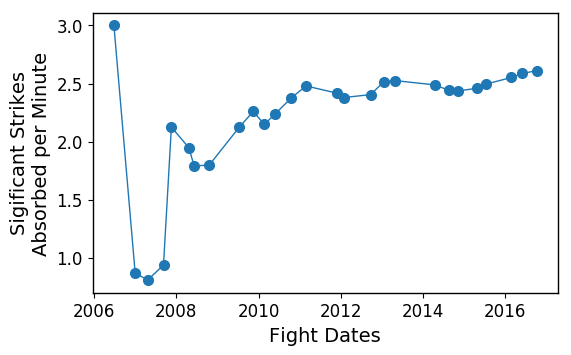

In [16]:
x = 'Michael Bisping'
ta = fights[fights.Winner == x][['Date', 'AveSaPM']]
tb = fights[fights.Loser == x][['Date', 'AveSaPM_L']]
tb.columns = ['Date', 'AveSaPM']
tab = ta.append(tb).sort_values('Date')
plt.plot(tab.Date, tab.AveSaPM, marker='o')
plt.xlabel('Fight Dates')
plt.ylabel('Sigificant Strikes\nAbsorbed per Minute')

## Pull in more data sets

In [17]:
iofile = 'data/ufc_name_education.csv'
ufc = pd.read_csv(iofile, header=0)
ufc.head(3)

,Name,Education
0,Jim Alers,1
1,Corey Anderson,1
2,Rich Attonito,1


In [18]:
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
cols = ['Name', 'Height', 'Reach', 'LegReach', 'Stance', 'Dob']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df = df.drop(['Name', 'Name_L'], axis=1)
df = df.merge(ufc, left_on='Winner', right_on='Name', how='left')
df = df.merge(ufc, left_on='Loser', right_on='Name', how='left', suffixes=('', '_L'))
df.Education = df.Education.fillna(0.0)
df.Education_L = df.Education_L.fillna(0.0)
df = df.drop(['Name', 'Name_L'], axis=1)
df.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Knockdowns,SigStrikesLanded,SigStrikesAttempted,TotStrikesLanded,TotStrikesAttempted,TakedownLanded,TakedownAttempted,SubsAttempted,Pass,Reversal,Knockdowns_L,SigStrikesLanded_L,SigStrikesAttempted_L,TotStrikesLanded_L,TotStrikesAttempted_L,TakedownLanded_L,TakedownAttempted_L,SubsAttempted_L,Pass_L,Reversal_L,Minutes,AveTakedownAccuracy,AveTakedownDefense,AveTakedownPM,AveSigStrkAccuracy,AveSigStrkDefense,AveSlPM,AveSaPM,AveKnockdownsPM,AveSubsAttemptedPM,AvePassPM,AveReversalPM,TotalDamageAbsorbed,AveTakedownAccuracy_L,AveTakedownDefense_L,AveTakedownPM_L,AveSigStrkAccuracy_L,AveSigStrkDefense_L,AveSlPM_L,AveSaPM_L,AveKnockdownsPM_L,AveSubsAttemptedPM_L,AvePassPM_L,AveReversalPM_L,TotalDamageAbsorbed_L,NumFights,NumFights_L,NumWins,NumWins_L,WinRatio,WinRatio_L,TimeSince,TimeSince_L,Champ,Champ_L,WTKO,WTKO_L,WSUB,WSUB_L,LTKO,LTKO_L,LSUB,LSUB_L,WDEC,WDEC_L,total_time,total_time_L,FVI,FVI_L,Height,Reach,LegReach,Stance,Dob,Height_L,Reach_L,LegReach_L,Stance_L,Dob_L,Education,Education_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",0.0,80.0,150.0,144.0,223.0,0.0,1.0,0.0,0.0,0.0,0.0,77.0,182.0,122.0,235.0,0.0,9.0,0.0,0.0,0.0,25.000000,0.400000,0.823529,0.000000,0.487562,0.724138,3.295964,1.883408,0.033632,0.000000,0.033632,0.000000,56.0,1.000000,0.772727,0.023673,0.327456,0.630282,3.077530,2.485697,0.011837,0.000000,0.000000,0.000000,210.0,4,5,3,3,0.750000,0.600000,3.685302,3.367296,0,1,0.666667,0.333333,0.0000,0.000000,1.0,0.000000,0.0,0.500000,0.333333,0.666667,29.733333,84.483333,0.400000,0.400000,69.0,71.0,41.0,Orthodox,1984-04-24,68.0,69.0,38.0,Southpaw,1981-10-17,0.0,0.0
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",0.0,43.0,78.0,54.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,101.0,118.0,184.0,2.0,10.0,0.0,0.0,0.0,15.000000,0.750000,0.753846,0.015412,0.641612,0.622558,3.025944,2.183406,0.092474,0.030825,0.015412,0.005137,425.0,0.297297,1.000000,0.198079,0.420048,0.503145,3.169268,2.845138,0.054022,0.054022,0.252101,0.000000,158.0,20,9,16,7,0.800000,0.777778,3.433987,2.397895,1,0,0.687500,0.571429,0.1875,0.142857,0.5,1.000000,0.0,0.000000,0.125000,0.285714,194.650000,55.533333,0.455224,0.666667,74.0,77.0,42.0,Southpaw,1975-04-14,73.0,77.0,43.0,Southpaw,1984-01-04,0.0,1.0
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",0.0,7.0,18.0,15.0,30.0,1.0,2.0,1.0,2.0,0.0,0.0,6.0,10.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,3.683333,0.344828,1.000000,0.172166,0.561837,0.593156,2.737446,1.842181,0.017217,0.103300,0.361549,0.017217,107.0,0.355932,0.583333,0.111811,0.509434,0.566749,2.875144,2.816576,0.037270,0.058568,0.079865,0.010649,529.0,7,20,6,11,0.857143,0.550000,3.663562,2.564949,0,0,0.333333,0.545455,0.5000,0.000000,0.0,0.444444,0.0,0.333333,0.166667,0.454545,58.083333,187.816667,0.785714,0.491803,73.0,72.0,41.0,Orthodox,1979-12-07,72.0,74.0,42.0,Orthodox,1981-01-28,0.0,1.0


iofile = 'data/fightmetric_career_stats.csv'
cstats = pd.read_csv(iofile, header=0)
cstats.head(3)

df = df.merge(cstats, left_on='Winner', right_on='Name', how='left')
df = df.merge(cstats, left_on='Loser', right_on='Name', how='left', suffixes=('', '_L'))
df = df.drop(['Name', 'Name_L'], axis=1)

### More derived features

In [19]:
df['Age'] = (df.Date - df.Dob) / np.timedelta64(1, 'Y')
df['Age_L'] = (df.Date - df.Dob_L) / np.timedelta64(1, 'Y')
# replaced next two with TotalDamageAbsorbed
#df['AccDamageAbsorbed'] = df.AveSaPM * df.total_time
#df['AccDamageAbsorbed_L'] = df.AveSaPM_L * df.total_time_L
df['AllStrikesThrownPM'] = df.AveSlPM / df.AveSigStrkAccuracy
df['AllStrikesThrownPM_L'] = df.AveSlPM_L / df.AveSigStrkAccuracy_L
# note that the quantities below depend on both fighters
df['ExpectedStrikesAbsorbedPM'] = df.AveSigStrkDefense * (df.AveSlPM_L / df.AveSigStrkAccuracy_L)
df['ExpectedStrikesAbsorbedPM_L'] = df.AveSigStrkDefense_L * (df.AveSlPM / df.AveSigStrkAccuracy)
df['TkoSuscept'] = np.sqrt(df.LTKO * df.WTKO_L)
df['TkoSuscept_L'] = np.sqrt(df.LTKO_L * df.WTKO)
df['SubSuscept'] = np.sqrt(df.LSUB * df.WSUB_L)
df['SubSuscept_L'] = np.sqrt(df.LSUB_L * df.WSUB)

In [20]:
df.AllStrikesThrownPM = df.AllStrikesThrownPM.fillna(0.0)
df.AllStrikesThrownPM_L = df.AllStrikesThrownPM_L.fillna(0.0)

df.ExpectedStrikesAbsorbedPM = df.ExpectedStrikesAbsorbedPM.fillna(0.0)
df.ExpectedStrikesAbsorbedPM_L = df.ExpectedStrikesAbsorbedPM_L.fillna(0.0)

df.TkoSuscept = df.TkoSuscept.fillna(0.0)
df.TkoSuscept_L = df.TkoSuscept_L.fillna(0.0)

df.SubSuscept = df.SubSuscept.fillna(0.0)
df.SubSuscept_L = df.SubSuscept_L.fillna(0.0)

In [21]:
cols = ['WeightClass', 'Method', 'MethodNotes', 'Round', 'Time', 'Event', 'Location']
cols2 = [u'Knockdowns', u'SigStrikesLanded', u'SigStrikesAttempted', u'TotStrikesLanded', u'TotStrikesAttempted', u'TakedownLanded', u'TakedownAttempted', u'SubsAttempted', u'Pass', u'Reversal', u'Knockdowns_L', u'SigStrikesLanded_L', u'SigStrikesAttempted_L', u'TotStrikesLanded_L', u'TotStrikesAttempted_L', u'TakedownLanded_L', u'TakedownAttempted_L', u'SubsAttempted_L', u'Pass_L', u'Reversal_L']
df = df.drop(cols + cols2, axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 75 columns):
Winner                         4000 non-null object
Outcome                        4000 non-null object
Loser                          4000 non-null object
Date                           4000 non-null datetime64[ns]
Minutes                        4000 non-null float64
AveTakedownAccuracy            4000 non-null float64
AveTakedownDefense             4000 non-null float64
AveTakedownPM                  4000 non-null float64
AveSigStrkAccuracy             4000 non-null float64
AveSigStrkDefense              4000 non-null float64
AveSlPM                        4000 non-null float64
AveSaPM                        4000 non-null float64
AveKnockdownsPM                4000 non-null float64
AveSubsAttemptedPM             4000 non-null float64
AvePassPM                      4000 non-null float64
AveReversalPM                  4000 non-null float64
TotalDamageAbsorbed            4000 non-n

### Impute legreach using previously developed models

In [23]:
# see leg_reach_model.ipynb
def impute_legreach(x):
     if (pd.isnull(x.LegReach) and pd.notnull(x.Reach) and pd.notnull(x.Height)): 
          return 0.16095475 * x.Reach + 0.42165158 * x.Height - 0.901274878
     elif (pd.isnull(x.LegReach) and pd.notnull(x.Height)):
          return 0.59770 * x.Height - 1.69697
     else:
          return x.LegReach

In [24]:
def impute_legreach_L(x):
     if (pd.isnull(x.LegReach_L) and pd.notnull(x.Reach_L) and pd.notnull(x.Height_L)): 
          return 0.16095475 * x.Reach_L + 0.42165158 * x.Height_L - 0.901274878
     elif (pd.isnull(x.LegReach_L) and pd.notnull(x.Height_L)):
          return 0.59770 * x.Height_L - 1.69697
     else:
          return x.LegReach_L

In [25]:
df.LegReach = df.apply(impute_legreach, axis=1)
df.LegReach_L = df.apply(impute_legreach_L, axis=1)

In [26]:
def impute_reach(x):
     if (pd.isnull(x.Reach) and pd.notnull(x.Height)):
          return 1.093792 * x.Height - 4.94361
     else:
          return x.Reach

In [27]:
def impute_reach_L(x):
     if (pd.isnull(x.Reach_L) and pd.notnull(x.Height_L)):
          return 1.093792 * x.Height_L - 4.94361
     else:
          return x.Reach_L

In [28]:
df.Reach = df.apply(impute_reach, axis=1)
df.Reach_L = df.apply(impute_reach_L, axis=1)

In [29]:
df.describe()

,Minutes,AveTakedownAccuracy,AveTakedownDefense,AveTakedownPM,AveSigStrkAccuracy,AveSigStrkDefense,AveSlPM,AveSaPM,AveKnockdownsPM,AveSubsAttemptedPM,AvePassPM,AveReversalPM,TotalDamageAbsorbed,AveTakedownAccuracy_L,AveTakedownDefense_L,AveTakedownPM_L,AveSigStrkAccuracy_L,AveSigStrkDefense_L,AveSlPM_L,AveSaPM_L,AveKnockdownsPM_L,AveSubsAttemptedPM_L,AvePassPM_L,AveReversalPM_L,TotalDamageAbsorbed_L,NumFights,NumFights_L,NumWins,NumWins_L,WinRatio,WinRatio_L,TimeSince,TimeSince_L,Champ,Champ_L,WTKO,WTKO_L,WSUB,WSUB_L,LTKO,LTKO_L,LSUB,LSUB_L,WDEC,WDEC_L,total_time,total_time_L,FVI,FVI_L,Height,Reach,LegReach,Height_L,Reach_L,LegReach_L,Education,Education_L,Age,Age_L,AllStrikesThrownPM,AllStrikesThrownPM_L,ExpectedStrikesAbsorbedPM,ExpectedStrikesAbsorbedPM_L,TkoSuscept,TkoSuscept_L,SubSuscept,SubSuscept_L
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,3998.000000,3998.000000,3998.000000,3993.000000,3993.000000,3993.000000,4000.00000,4000.000000,3956.000000,3868.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,9.947462,0.462222,0.612104,0.154031,0.460340,0.574772,3.233248,2.647316,0.040553,0.076103,0.142652,0.014570,108.810000,0.441346,0.590015,0.128035,0.451113,0.560869,3.035416,2.866268,0.038543,0.075128,0.108831,0.014477,106.133250,4.447000,4.122750,2.968000,2.620500,0.519045,0.453801,3.065159,3.081456,0.069000,0.048500,0.265184,0.233319,0.171082,0.157732,0.185939,0.192169,0.149635,0.140412,0.292903,0.270399,44.494646,40.655550,0.239790,0.206432,70.844172,72.685747,40.606884,70.738042,72.414785,40.565316,0.19500,0.155500,29.243951,29.928643,7.082848,6.786359,3.906751,3.978230,0.088566,0.099927,0.046638,0.047782
std,6.053887,0.227189,0.228662,0.584857,0.109475,0.109657,2.985609,1.787199,0.216033,0.137579,0.427821,0.034841,134.705181,0.225637,0.228585,0.122726,0.109659,0.109707,1.717720,1.701589,0.256111,0.136433,0.157525,0.036296,139.338603,4.619635,4.792434,3.306843,3.305179,0.362184,0.367759,0.577491,0.624952,0.253486,0.214847,0.339840,0.331981,0.289720,0.287300,0.324368,0.334036,0.303600,0.295991,0.345977,0.350056,51.366094,51.078397,0.297557,0.286754,3.299340,3.919001,2.245652,3.228676,3.768549,2.096416,0.39625,0.362426,3.969839,4.125320,5.745119,3.355274,2.079540,3.292841,0.218262,0.232906,0.162455,0.161665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.619039,0.043271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,60.000000,32.000000,60.000000,60.000000,32.000000,0.00000,0.000000,19.589725,18.267316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000,0.376645,0.538462,0.058840,0.403327,0.537741,2.333092,1.804489,0.000000,0.000000,0.000000,0.000000,10.000000,0.368059,0.500000,0.049406,0.401001,0.526316,2.245860,2.063491,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.736221,2.708050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.133333,1.491667,0.000000,0.000000,69.000000,70.000000,39.000000,69.000000,70.000000,39.000000,0.00000,0.000000,26.3

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 75 columns):
Winner                         4000 non-null object
Outcome                        4000 non-null object
Loser                          4000 non-null object
Date                           4000 non-null datetime64[ns]
Minutes                        4000 non-null float64
AveTakedownAccuracy            4000 non-null float64
AveTakedownDefense             4000 non-null float64
AveTakedownPM                  4000 non-null float64
AveSigStrkAccuracy             4000 non-null float64
AveSigStrkDefense              4000 non-null float64
AveSlPM                        4000 non-null float64
AveSaPM                        4000 non-null float64
AveKnockdownsPM                4000 non-null float64
AveSubsAttemptedPM             4000 non-null float64
AvePassPM                      4000 non-null float64
AveReversalPM                  4000 non-null float64
TotalDamageAbsorbed            4000 non-n

# Still need to convert stance and drop many features

Filter fights to defeats since January 1, 2005:

In [31]:
fs = df[(df.Date > pd.to_datetime('2005-01-01')) & (df.Outcome == 'def.')].copy()
fs.shape[0]

3561

# Compute accuracy using simple rules

### Higher SlPM wins

In [32]:
vd = fs[(fs.NumFights > 4) & (fs.NumFights_L > 4)]
wins = vd[vd.AveSlPM > vd.AveSlPM_L].shape[0]
total = vd.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(435, 779, 0.558408215661104, 2782, 0.0012472784353326546)

### Higher Average takedowns

In [33]:
vd = fs[(fs.NumFights > 4) & (fs.NumFights_L > 4)]
wins = vd[vd.AveTakedownPM > vd.AveTakedownPM_L].shape[0]
total = vd.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(420, 779, 0.5391527599486521, 2782, 0.031511151304346764)

### Higher Striking accuracy

In [34]:
vd = fs[(fs.NumFights > 4) & (fs.NumFights_L > 4)]
wins = vd[vd.AveSigStrkAccuracy > vd.AveSigStrkAccuracy_L].shape[0]
total = vd.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(390, 779, 0.5006418485237484, 2782, 1.0000000000000213)

### Accumulated damage

In [35]:
vd = fs[(fs.NumFights > 4) & (fs.NumFights_L > 4)]
wins = vd[vd.TotalDamageAbsorbed < vd.TotalDamageAbsorbed_L].shape[0]
total = vd.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(391, 779, 0.5019255455712451, 2782, 0.94288061025114711)

### Younger wins

In [36]:
yw = fs[pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & (fs.Dob != fs.Dob_L)]
wins = yw[yw.Dob > yw.Dob_L].shape[0]
total = yw.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1964, 3529, 0.5565315953527912, 32, 1.9906913544237038e-11)

### Longer reach wins

In [37]:
lr = fs[pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L) & (fs.Reach != fs.Reach_L)]
wins = lr[lr.Reach > lr.Reach_L].shape[0]
total = lr.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1651, 3136, 0.5264668367346939, 425, 0.0032084146770581731)

What if we don't exclude nulls?

In [38]:
lr = fs[fs.Reach != fs.Reach_L]
wins = lr[lr.Reach > lr.Reach_L].shape[0]
total = lr.shape[0]
wins, total, wins / float(total), fs.shape[0] - total

(1651, 3137, 0.5262990117947083, 424)

In [39]:
71.0 > np.nan

False

In [40]:
71.0 == np.nan

False

In [41]:
lr[['Reach', 'Reach_L']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3137 entries, 0 to 3580
Data columns (total 2 columns):
Reach      3137 non-null float64
Reach_L    3136 non-null float64
dtypes: float64(2)
memory usage: 73.5 KB


We see that nulls in Reach_L lead to Falses which increased the total which gave a win ratio less than 1/2.

### Taller wins

In [42]:
ht = fs[pd.notnull(fs.Height) & pd.notnull(fs.Height_L) & (fs.Height != fs.Height_L)]
wins = ht[ht.Height > ht.Height_L].shape[0]
total = ht.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1486, 2903, 0.511884257664485, 658, 0.20691383522689766)

### Stance

In [43]:
st = fs[pd.notnull(fs.Stance) & pd.notnull(fs.Stance_L) & (((fs.Stance == 'Orthodox') & (fs.Stance_L == 'Southpaw')) | ((fs.Stance == 'Southpaw') & (fs.Stance_L == 'Orthodox')))]
wins = st[st.Stance == 'Southpaw'].shape[0]
total = st.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(561, 1010, 0.5554455445544555, 2551, 0.00047237811629372023)

### Education

In [44]:
ed = fs[pd.notnull(fs.Education) & pd.notnull(fs.Education_L) & (fs.Education != fs.Education_L)]
wins = ed[ed.Education == 1].shape[0]
total = ed.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(594, 1051, 0.5651760228353948, 2510, 2.6619836969235326e-05)

### Leg reach

In [45]:
lg = fs[pd.notnull(fs.LegReach) & pd.notnull(fs.LegReach_L) & (fs.LegReach != fs.LegReach_L)]
wins = lg[lg.LegReach > lg.LegReach_L].shape[0]
total = lg.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1639, 3267, 0.5016835016835017, 294, 0.86111868681280257)

### Predict winner has more UFC fights

In [46]:
nf = fs[pd.notnull(fs.NumFights) & pd.notnull(fs.NumFights_L) & (fs.NumFights != fs.NumFights_L)]
wins = nf[nf.NumFights > nf.NumFights_L].shape[0]
total = nf.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1606, 2886, 0.5564795564795565, 675, 1.3957729165251447e-09)

### Predict winner has higher win ratio (for 5 fights or more)

In [47]:
wr = fs[pd.notnull(fs.WinRatio) & pd.notnull(fs.WinRatio_L) & (fs.WinRatio != fs.WinRatio_L) & (fs.NumFights > 4) & (fs.NumFights_L > 4)]
wins = wr[wr.WinRatio > wr.WinRatio_L].shape[0]
total = wr.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(439, 737, 0.5956580732700135, 2824, 2.3149181853620525e-07)

In [48]:
# How does the result change if we replace NaN with 0.5 and don't require a certain number of fights?
# Ans: (1571, 2728, 0.5758797653958945, 833, 2.331962646952389e-15)
#fs.WinRatio = fs.WinRatio.fillna(0.5)
#fs.WinRatio_L = fs.WinRatio_L.fillna(0.5)

### Fighter who fought more recently wins

In [49]:
vd = fs[pd.notnull(fs.TimeSince) & pd.notnull(fs.TimeSince_L) & (fs.TimeSince != fs.TimeSince_L)]

wins = vd[vd.TimeSince < vd.TimeSince_L].shape[0]
total = vd.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1693, 3355, 0.5046199701937407, 206, 0.60451041588402965)

### Current or former champion wins

In [50]:
vd = fs[pd.notnull(fs.Champ) & pd.notnull(fs.Champ_L) & (fs.Champ != fs.Champ_L)]

wins = vd[vd.Champ == 1].shape[0]
total = vd.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(175, 283, 0.6183745583038869, 3278, 8.1395030523305145e-05)

### Higher win ratio and younger

In [51]:
vd = fs[pd.notnull(fs.WinRatio) & pd.notnull(fs.WinRatio_L) & pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & (fs.WinRatio != fs.WinRatio_L) & (fs.Dob != fs.Dob_L) & (fs.NumFights > 4) & (fs.NumFights_L > 4)]
msk1 = (vd.WinRatio > vd.WinRatio_L) & (vd.Dob > vd.Dob_L)
msk2 = (vd.WinRatio < vd.WinRatio_L) & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[sp.WinRatio > sp.WinRatio_L].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(256, 407, 0.628992628992629, 3154, 2.1864763337164381e-07)

### Reach advantage of 4 inches or more (this and others changed after imputing)

In [52]:
vd = fs[pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L)]
msk1 = np.abs(vd.Reach - vd.Reach_L) >= 4

sp = vd[msk1]
wins = sp[(sp.Reach > sp.Reach_L)].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(564, 1002, 0.562874251497006, 2559, 7.6945405221093147e-05)

In [53]:
sp[['Winner', 'Reach', 'Loser', 'Reach_L']].head(10)

,Winner,Reach,Loser,Reach_L
5,Belal Muhammad,72.0,Randy Brown,78.0
6,Wilson Reis,65.0,Ulka Sasaki,71.0
10,Chan Sung Jung,72.0,Dennis Bermudez,66.0
12,James Vick,76.0,Abel Trujillo,70.0
13,Volkan Oezdemir,75.0,Ovince Saint Preux,80.0
16,Curtis Blaydes,80.0,Adam Milstead,76.0
17,Chas Skelly,72.0,Chris Gruetzemacher,68.0
18,Ricardo Ramos,72.0,Michinori Tanaka,67.0
19,Tecia Torres,60.0,Bec Rawlings,64.0
20,Niko Price,76.0,Alex Morono,72.0


### 4 years or more younger

In [54]:
vd = fs[pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L)]
msk1 = ((vd.Dob - vd.Dob_L) / np.timedelta64(1, 'Y'))**2 >= 16

sp = vd[msk1]
wins = sp[(sp.Dob > sp.Dob_L)].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(893, 1511, 0.5909993381866314, 2050, 1.5717573327498843e-12)

In [55]:
sp[['Winner', 'Dob', 'Loser', 'Dob_L']].head(20)

,Winner,Dob,Loser,Dob_L
1,Anderson Silva,1975-04-14,Derek Brunson,1984-01-04
3,Glover Teixeira,1979-10-28,Jared Cannonier,1984-03-16
4,Dustin Poirier,1989-01-19,Jim Miller,1983-08-30
6,Wilson Reis,1985-01-06,Ulka Sasaki,1989-10-07
7,Islam Makhachev,1991-10-27,Nik Lentz,1984-08-13
8,Rick Glenn,1989-04-12,Phillipe Nover,1984-02-03
9,Ryan LaFlare,1983-10-01,Roan Carneiro,1978-06-02
11,Felice Herrig,1984-09-18,Alexa Grasso,1993-08-09
13,Volkan Oezdemir,1989-09-19,Ovince Saint Preux,1983-04-08
14,Marcel Fortuna,1985-10-22,Anthony Hamilton,1980-04-14


### Younger and greater reach

In [56]:
vd = fs[pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L)]
msk1 = (vd.Reach > vd.Reach_L) & (vd.Dob > vd.Dob_L)
msk2 = (vd.Reach < vd.Reach_L) & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[(sp.Dob > sp.Dob_L) & (sp.Reach > sp.Reach_L)].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(1001, 1739, 0.5756181713628522, 1822, 3.0848358182805982e-10)

### Southpaw and younger

In [57]:
vd = fs[pd.notnull(fs.Stance) & pd.notnull(fs.Stance_L) & pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L)]
msk1 = (vd.Stance == 'Southpaw') & (vd.Stance_L == 'Orthodox') & (vd.Dob > vd.Dob_L)
msk2 = (vd.Stance == 'Orthodox') & (vd.Stance_L == 'Southpaw') & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[sp.Stance == 'Southpaw'].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(284, 460, 0.6173913043478261, 3101, 5.4168911673341359e-07)

### South, younger and greater reach

In [58]:
vd = fs[pd.notnull(fs.Stance) & pd.notnull(fs.Stance_L) & pd.notnull(fs.Dob) & pd.notnull(fs.Dob_L) & pd.notnull(fs.Reach) & pd.notnull(fs.Reach_L)]
msk1 = (vd.Stance == 'Southpaw') & (vd.Stance_L == 'Orthodox') & (vd.Reach > vd.Reach_L) & (vd.Dob > vd.Dob_L)
msk2 = (vd.Stance == 'Orthodox') & (vd.Stance_L == 'Southpaw') & (vd.Reach < vd.Reach_L) & (vd.Dob < vd.Dob_L)

sp = vd[msk1 | msk2]
wins = sp[sp.Stance == 'Southpaw'].shape[0]
total = sp.shape[0]
wins, total, wins / float(total), fs.shape[0] - total, 2 * binom.cdf(p=0.5, k=min(wins, total - wins), n=total)

(136, 221, 0.6153846153846154, 3340, 0.0007336410278074813)

In [59]:
sp[['Winner', 'Dob', 'Reach', 'Stance', 'Loser', 'Dob_L', 'Reach_L', 'Stance_L']].head()

,Winner,Dob,Reach,Stance,Loser,Dob_L,Reach_L,Stance_L
26,Sam Alvey,1986-05-06,75.0,Southpaw,Nate Marquardt,1979-04-20,74.0,Orthodox
33,Jason Gonzalez,1990-02-28,74.0,Southpaw,JC Cottrell,1989-11-04,71.0,Orthodox
67,Sultan Aliev,1984-09-17,74.0,Orthodox,Bojan Velickovic,1988-12-18,76.0,Southpaw
91,Juliana Lima,1982-03-15,65.0,Orthodox,JJ Aldrich,1992-09-29,67.0,Southpaw
92,Demetrious Johnson,1986-08-13,64.0,Orthodox,Tim Elliott,1986-12-24,65.0,Southpaw


### Overall win ratio

In [60]:
fs_fighters = fs.Winner.append(fs.Loser).value_counts().to_frame()
wins = fs.Winner.value_counts().to_frame()
loses = fs.Loser.value_counts().to_frame()
fs_fighters = fs_fighters.merge(wins, left_index=True, right_index=True, how='left')
fs_fighters = fs_fighters.merge(loses, left_index=True, right_index=True, how='left')
fs_fighters = fs_fighters.fillna(0.0)
fs_fighters.columns = ['Total', 'Wins', 'Losses']
fs_fighters['WinRatio'] = fs_fighters.Wins / (fs_fighters.Wins + fs_fighters.Losses)

In [61]:
ws = fs.merge(fs_fighters[['Total', 'WinRatio']], left_on='Winner', right_index=True, how='left')
ws = ws.merge(fs_fighters[['Total', 'WinRatio']], left_on='Loser', right_index=True, how='left', suffixes=('', '_L'))
ws.head(3)

,Winner,Outcome,Loser,Date,Minutes,AveTakedownAccuracy,AveTakedownDefense,AveTakedownPM,AveSigStrkAccuracy,AveSigStrkDefense,AveSlPM,AveSaPM,AveKnockdownsPM,AveSubsAttemptedPM,AvePassPM,AveReversalPM,TotalDamageAbsorbed,AveTakedownAccuracy_L,AveTakedownDefense_L,AveTakedownPM_L,AveSigStrkAccuracy_L,AveSigStrkDefense_L,AveSlPM_L,AveSaPM_L,AveKnockdownsPM_L,AveSubsAttemptedPM_L,AvePassPM_L,AveReversalPM_L,TotalDamageAbsorbed_L,NumFights,NumFights_L,NumWins,NumWins_L,WinRatio_x,WinRatio_L,TimeSince,TimeSince_L,Champ,Champ_L,WTKO,WTKO_L,WSUB,WSUB_L,LTKO,LTKO_L,LSUB,LSUB_L,WDEC,WDEC_L,total_time,total_time_L,FVI,FVI_L,Height,Reach,LegReach,Stance,Dob,Height_L,Reach_L,LegReach_L,Stance_L,Dob_L,Education,Education_L,Age,Age_L,AllStrikesThrownPM,AllStrikesThrownPM_L,ExpectedStrikesAbsorbedPM,ExpectedStrikesAbsorbedPM_L,TkoSuscept,TkoSuscept_L,SubSuscept,SubSuscept_L,Total,WinRatio_y,Total_L,WinRatio
0,Germaine de Randamie,def.,Holly Holm,2017-02-11,25.000000,0.400000,0.823529,0.000000,0.487562,0.724138,3.295964,1.883408,0.033632,0.000000,0.033632,0.000000,56.0,1.000000,0.772727,0.023673,0.327456,0.630282,3.077530,2.485697,0.011837,0.000000,0.000000,0.000000,210.0,4,5,3,3,0.750000,0.600000,3.685302,3.367296,0,1,0.666667,0.333333,0.0000,0.000000,1.0,0.000000,0.0,0.500000,0.333333,0.666667,29.733333,84.483333,0.400000,0.400000,69.0,71.0,41.0,Orthodox,1984-04-24,68.0,69.0,38.0,Southpaw,1981-10-17,0.0,0.0,32.802864,35.321738,6.760090,9.398303,6.805668,4.260761,0.577350,0.000000,0.0,0.000000,5,0.800000,6,0.50000
1,Anderson Silva,def.,Derek Brunson,2017-02-11,15.000000,0.750000,0.753846,0.015412,0.641612,0.622558,3.025944,2.183406,0.092474,0.030825,0.015412,0.005137,425.0,0.297297,1.000000,0.198079,0.420048,0.503145,3.169268,2.845138,0.054022,0.054022,0.252101,0.000000,158.0,20,9,16,7,0.800000,0.777778,3.433987,2.397895,1,0,0.687500,0.571429,0.1875,0.142857,0.5,1.000000,0.0,0.000000,0.125000,0.285714,194.650000,55.533333,0.455224,0.666667,74.0,77.0,42.0,Southpaw,1975-04-14,73.0,77.0,43.0,Southpaw,1984-01-04,0.0,1.0,41.832481,33.106772,4.716157,7.545018,4.697209,2.372909,0.534522,0.829156,0.0,0.000000,21,0.809524,10,0.70000
2,Jacare Souza,def.,Tim Boetsch,2017-02-11,3.683333,0.344828,1.000000,0.172166,0.561837,0.593156,2.737446,1.842181,0.017217,0.103300,0.361549,0.017217,107.0,0.355932,0.583333,0.111811,0.509434,0.566749,2.875144,2.816576,0.037270,0.058568,0.079865,0.010649,529.0,7,20,6,11,0.857143,0.550000,3.663562,2.564949,0,0,0.333333,0.545455,0.5000,0.000000,0.0,0.444444,0.0,0.333333,0.166667,0.454545,58.083333,187.816667,0.785714,0.491803,73.0,72.0,41.0,Orthodox,1979-12-07,72.0,74.0,42.0,Orthodox,1981-01-28,0.0,1.0,37.183515,36.039070,4.872310,5.643802,3.347654,2.761375,0.000000,0.384900,0.0,0.408248,8,0.875000,21,0.52381


In [62]:
ws = ws[pd.notnull(ws.WinRatio) & pd.notnull(ws.WinRatio_L) & (ws.Total > 5) & (ws.Total_L > 5)]
wins = ws[ws.WinRatio > ws.WinRatio_L].shape[0]
total = ws.shape[0]
wins, total, wins / float(total), ws.shape[0] - total

(263, 1693, 0.1553455404607206, 0)

# Part II: Cleaning, imputing and standardizing

In [63]:
fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 0 to 3580
Data columns (total 75 columns):
Winner                         3561 non-null object
Outcome                        3561 non-null object
Loser                          3561 non-null object
Date                           3561 non-null datetime64[ns]
Minutes                        3561 non-null float64
AveTakedownAccuracy            3561 non-null float64
AveTakedownDefense             3561 non-null float64
AveTakedownPM                  3561 non-null float64
AveSigStrkAccuracy             3561 non-null float64
AveSigStrkDefense              3561 non-null float64
AveSlPM                        3561 non-null float64
AveSaPM                        3561 non-null float64
AveKnockdownsPM                3561 non-null float64
AveSubsAttemptedPM             3561 non-null float64
AvePassPM                      3561 non-null float64
AveReversalPM                  3561 non-null float64
TotalDamageAbsorbed            3561 non-n

### Replace stance with numerical values

In [64]:
fs.Stance.value_counts()

Orthodox       2620
Southpaw        751
Switch           70
Open Stance      13
Name: Stance, dtype: int64

In [65]:
fs.Stance_L.value_counts()

Orthodox       2704
Southpaw        636
Switch           79
Open Stance       9
Sideways          1
Name: Stance_L, dtype: int64

In [66]:
gs = fs[fs.Stance.isin(['Southpaw', 'Orthodox', 'Switch']) & fs.Stance_L.isin(['Southpaw', 'Orthodox', 'Switch'])].copy()

In [67]:
gs['Southpaw'] = gs.Stance.apply(lambda x: 1 if x == 'Southpaw' else 0)
gs['Orthodox'] = gs.Stance.apply(lambda x: 1 if x == 'Orthodox' else 0)
gs['Switch'] = gs.Stance.apply(lambda x: 1 if x == 'Switch' else 0)
gs['Southpaw_L'] = gs.Stance_L.apply(lambda x: 1 if x == 'Southpaw' else 0)
gs['Orthodox_L'] = gs.Stance_L.apply(lambda x: 1 if x == 'Orthodox' else 0)
gs['Switch_L'] = gs.Stance_L.apply(lambda x: 1 if x == 'Switch' else 0)

Write out feature matrix before stripping non-numerical columns:

In [68]:
gs.to_csv('data/feature_matrix_before.csv', index=False)

Drop columns and reset index:

In [69]:
cols = set(gs.columns)
cols = cols - set(['Winner', 'Loser', 'Outcome', 'Date', 'Minutes', 'Dob', 'Dob_L', 'Stance', 'Stance_L'])
cols = list(cols)
gs = gs[cols].dropna().reset_index(drop=True)

In [70]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 72 columns):
total_time_L                   3300 non-null float64
TimeSince_L                    3300 non-null float64
TkoSuscept_L                   3300 non-null float64
AvePassPM                      3300 non-null float64
TimeSince                      3300 non-null float64
WDEC_L                         3300 non-null float64
AveSaPM_L                      3300 non-null float64
AveTakedownDefense             3300 non-null float64
WSUB_L                         3300 non-null float64
AveTakedownAccuracy            3300 non-null float64
WinRatio_L                     3300 non-null float64
AveReversalPM                  3300 non-null float64
AvePassPM_L                    3300 non-null float64
AveTakedownDefense_L           3300 non-null float64
LTKO                           3300 non-null float64
AveSigStrkDefense              3300 non-null float64
LTKO_L                         3300 non-null 

In [71]:
win_cols = sorted(filter(lambda x: not x.endswith('_L'), cols))
los_cols = sorted(filter(lambda x: x.endswith('_L'), cols))
gs = gs[win_cols + los_cols]

In [72]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 72 columns):
Age                            3300 non-null float64
AllStrikesThrownPM             3300 non-null float64
AveKnockdownsPM                3300 non-null float64
AvePassPM                      3300 non-null float64
AveReversalPM                  3300 non-null float64
AveSaPM                        3300 non-null float64
AveSigStrkAccuracy             3300 non-null float64
AveSigStrkDefense              3300 non-null float64
AveSlPM                        3300 non-null float64
AveSubsAttemptedPM             3300 non-null float64
AveTakedownAccuracy            3300 non-null float64
AveTakedownDefense             3300 non-null float64
AveTakedownPM                  3300 non-null float64
Champ                          3300 non-null int64
Education                      3300 non-null float64
ExpectedStrikesAbsorbedPM      3300 non-null float64
FVI                            3300 non-null fl

fig, axs = plt.subplots(nrows=31, ncols=2, figsize=(8, 80))
for i, (axi, axj) in enumerate(axs):
     axi.hist(gs[win_cols[i]])
     axi.set_xlabel(win_cols[i])
     axj.hist(gs[los_cols[i]])
     axj.set_xlabel(los_cols[i])
plt.tight_layout()

Generate all possible differences:

In [73]:
for column in win_cols:
     exec('gs[\'' + column + 'Diff\'] = gs.' + column + ' - ' + 'gs.' + column + '_L')

In [74]:
gs.describe()

,Age,AllStrikesThrownPM,AveKnockdownsPM,AvePassPM,AveReversalPM,AveSaPM,AveSigStrkAccuracy,AveSigStrkDefense,AveSlPM,AveSubsAttemptedPM,AveTakedownAccuracy,AveTakedownDefense,AveTakedownPM,Champ,Education,ExpectedStrikesAbsorbedPM,FVI,Height,LSUB,LTKO,LegReach,NumFights,NumWins,Orthodox,Reach,Southpaw,SubSuscept,Switch,TimeSince,TkoSuscept,TotalDamageAbsorbed,WDEC,WSUB,WTKO,WinRatio,total_time,Age_L,AllStrikesThrownPM_L,AveKnockdownsPM_L,AvePassPM_L,AveReversalPM_L,AveSaPM_L,AveSigStrkAccuracy_L,AveSigStrkDefense_L,AveSlPM_L,AveSubsAttemptedPM_L,AveTakedownAccuracy_L,AveTakedownDefense_L,AveTakedownPM_L,Champ_L,...,NumWins_L,Orthodox_L,Reach_L,Southpaw_L,SubSuscept_L,Switch_L,TimeSince_L,TkoSuscept_L,TotalDamageAbsorbed_L,WDEC_L,WSUB_L,WTKO_L,WinRatio_L,total_time_L,AgeDiff,AllStrikesThrownPMDiff,AveKnockdownsPMDiff,AvePassPMDiff,AveReversalPMDiff,AveSaPMDiff,AveSigStrkAccuracyDiff,AveSigStrkDefenseDiff,AveSlPMDiff,AveSubsAttemptedPMDiff,AveTakedownAccuracyDiff,AveTakedownDefenseDiff,AveTakedownPMDiff,ChampDiff,EducationDiff,ExpectedStrikesAbsorbedPMDiff,FVIDiff,HeightDiff,LSUBDiff,LTKODiff,LegReachDiff,NumFightsDiff,NumWinsDiff,OrthodoxDiff,ReachDiff,SouthpawDiff,SubSusceptDiff,SwitchDiff,TimeSinceDiff,TkoSusceptDiff,TotalDamageAbsorbedDiff,WDECDiff,WSUBDiff,WTKODiff,WinRatioDiff,total_timeDiff
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,...,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.00000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,29.369506,7.113849,0.043943,0.136555,0.014241,2.656401,0.455783,0.579880,3.218435,0.072108,0.457549,0.616110,0.141702,0.070000,0.212121,3.999214,0.262500,70.775455,0.149774,0.194979,40.567318,4.864545,3.240606,0.759697,72.636552,0.220606,0.048881,0.019697,3.075349,0.096333,122.611212,0.315869,0.173906,0.273558,0.539104,49.533520,30.090599,6.881077,0.040370,0.111825,0.014974,2.887533,0.447664,0.564901,3.051370,0.071503,0.441511,0.590628,0.126351,0.050303,...,2.910909,0.792424,72.346934,0.184848,0.050522,0.022727,3.089151,0.107879,120.241212,0.29263,0.167035,0.244679,0.477632,45.776414,-0.721093,0.232772,0.003573,0.024730,-0.000732,-0.231132,0.008119,0.014980,0.167065,0.000606,0.016038,0.025482,0.015351,0.019697,0.036970,-0.032968,0.031276,0.104848,0.003238,-0.011882,0.052665,0.275758,0.329697,-0.032727,0.289618,0.035758,-0.001640,-0.003030,-0.013803,-0.011546,2.370000,0.023239,0.006872,0.028879,0.061472,3.757106
std,3.927659,3.599843,0.233191,0.195535,0.031260,1.359674,0.107835,0.106689,1.980960,0.118721,0.223304,0.228819,0.139414,0.255186,0.408872,2.091634,0.304137,3.301860,0.296905,0.325732,2.283366,4.778591,3.429494,0.427332,3.951601,0.414718,0.161433,0.138978,0.573158,0.222877,140.229754,0.344856,0.284999,0.336658,0.349147,53.286954,4.069416,3.301533,0.258022,0.149683,0.036204,1.699368,0.107726,0.106140,1.661993,0.121960,0.227748,0.229662,0.115584,0.218603,...,3.438712,0.405633,3.734558,0.388233,0.161493,0.149055,0.619455,0.236975,145.093757,

In [75]:
gs.corr().applymap(lambda x: abs(round(x, 2)))

,Age,AllStrikesThrownPM,AveKnockdownsPM,AvePassPM,AveReversalPM,AveSaPM,AveSigStrkAccuracy,AveSigStrkDefense,AveSlPM,AveSubsAttemptedPM,AveTakedownAccuracy,AveTakedownDefense,AveTakedownPM,Champ,Education,ExpectedStrikesAbsorbedPM,FVI,Height,LSUB,LTKO,LegReach,NumFights,NumWins,Orthodox,Reach,Southpaw,SubSuscept,Switch,TimeSince,TkoSuscept,TotalDamageAbsorbed,WDEC,WSUB,WTKO,WinRatio,total_time,Age_L,AllStrikesThrownPM_L,AveKnockdownsPM_L,AvePassPM_L,AveReversalPM_L,AveSaPM_L,AveSigStrkAccuracy_L,AveSigStrkDefense_L,AveSlPM_L,AveSubsAttemptedPM_L,AveTakedownAccuracy_L,AveTakedownDefense_L,AveTakedownPM_L,Champ_L,...,NumWins_L,Orthodox_L,Reach_L,Southpaw_L,SubSuscept_L,Switch_L,TimeSince_L,TkoSuscept_L,TotalDamageAbsorbed_L,WDEC_L,WSUB_L,WTKO_L,WinRatio_L,total_time_L,AgeDiff,AllStrikesThrownPMDiff,AveKnockdownsPMDiff,AvePassPMDiff,AveReversalPMDiff,AveSaPMDiff,AveSigStrkAccuracyDiff,AveSigStrkDefenseDiff,AveSlPMDiff,AveSubsAttemptedPMDiff,AveTakedownAccuracyDiff,AveTakedownDefenseDiff,AveTakedownPMDiff,ChampDiff,EducationDiff,ExpectedStrikesAbsorbedPMDiff,FVIDiff,HeightDiff,LSUBDiff,LTKODiff,LegReachDiff,NumFightsDiff,NumWinsDiff,OrthodoxDiff,ReachDiff,SouthpawDiff,SubSusceptDiff,SwitchDiff,TimeSinceDiff,TkoSusceptDiff,TotalDamageAbsorbedDiff,WDECDiff,WSUBDiff,WTKODiff,WinRatioDiff,total_timeDiff
Age,1.00,0.06,0.01,0.00,0.06,0.00,0.06,0.01,0.04,0.12,0.07,0.03,0.09,0.17,0.14,0.00,0.19,0.11,0.02,0.19,0.13,0.39,0.34,0.06,0.10,0.06,0.01,0.00,0.19,0.23,0.33,0.07,0.01,0.15,0.08,0.36,0.22,0.00,0.02,0.05,0.02,0.01,0.05,0.01,0.03,0.02,0.01,0.06,0.02,0.12,...,0.21,0.02,0.19,0.02,0.02,0.01,0.05,0.19,0.19,0.05,0.01,0.14,0.11,0.19,0.61,0.05,0.03,0.03,0.02,0.01,0.01,0.00,0.05,0.07,0.06,0.02,0.06,0.07,0.07,0.05,0.04,0.10,0.02,0.05,0.05,0.14,0.12,0.05,0.10,0.06,0.01,0.00,0.09,0.02,0.11,0.01,0.00,0.01,0.03,0.15
AllStrikesThrownPM,0.06,1.00,0.47,0.04,0.14,0.27,0.06,0.26,0.88,0.14,0.03,0.21,0.08,0.02,0.01,0.13,0.00,0.02,0.03,0.05,0.04,0.01,0.04,0.03,0.02,0.04,0.00,0.01,0.03,0.02,0.12,0.02,0.14,0.24,0.18,0.00,0.02,0.05,0.00,0.02,0.05,0.01,0.01,0.04,0.04,0.03,0.01,0.05,0.02,0.04,...,0.07,0.00,0.07,0.01,0.06,0.01,0.01,0.09,0.07,0.05,0.00,0.02,0.06,0.06,0.06,0.72,0.32,0.05,0.06,0.17,0.04,0.17,0.66,0.08,0.03,0.12,0.06,0.01,0.02,0.67,0.04,0.05,0.04,0.03,0.01,0.05,0.03,0.02,0.05,0.02,0.04,0.00,0.01,0.09,0.04,0.02,0.10,0.17,0.11,0.05
AveKnockdownsPM,0.01,0.47,1.00,0.01,0.03,0.02,0.18,0.04,0.66,0.03,0.02,0.04,0.07,0.01,0.00,0.02,0.04,0.04,0.02,0.03,0.04,0.03,0.01,0.02,0.04,0.02,0.02,0.02,0.00,0.01,0.05,0.09,0.05,0.26,0.16,0.06,0.01,0.01,0.00,0.01,0.01,0.02,0.00,0.02,0.01,0.02,0.02,0.01,0.01,0.02,...,0.01,0.00,0.01,0.01,0.02,0.02,0.00,0.10,0.00,0.02,0.02,0.05,0.03,0.00,0.02,0.35,0.67,0.01,0.02,0.00,0.13,0.02,0.51,0.00,0.00,0.02,0.06,0.01,0.01,0.36,0.04,0.03,0.03,0.03,0.02,0.04,0.02,0.01,0.03,0.00,0.00,0.03,0.00,0.09,0.05,0.08,0.02,0.17,0.11,0.06
AvePassPM,0.00,0.04,0.01,1.00,0.19,0.29,0.21,0.05,0.10,0.34,0.29,0.04,0.50,0.04,0.07,0.02,0.17,0.04,0.03,0.04,0.04,0.10,0.14,0.05,0.05,0.02,0.01,0.08,0.06,0.02,0.02,0.10,0.32,0.04,0.39,0.07,0.00,0.03,0.01,0.12,0.05,0.05,0.05,0.02,0.01,0.05,0.04,0.03,0.10,0.04,...,0.06,0.02,0.04,0.02,0.12,0.01,0.01,0.01,0.00,0.04,0.05,0.03,0.11,0.03,0.00,0.05,0.01,0.77,0.09,0.15,0.12,0.02,0.09,0.21,0.18,0.05,0.33,0.00,0.05,0.05,0.09,0.01,0.03,0.01,0.02,0.05,0.08,0.02,0.02,0.00,0.07,0.06,0.04,0.01,0.01,0.05,0.19,0.00,0.25,0.04
AveReversalPM,0.06,0.14,0.03,0.19,1.00,0.13,0.04,0.09,0.12,0.18,0.05,0.20,0.00,0.04,0.03,0.04,0.07,0.03,0.09,0.03,0.01,0.04,0.01,0.03,0.02,0.01,0.05,0.05,0.05,0.00,0.01,0.04,0.13,0.01,0.07,0.02,0.03,0.00,0.01,0.05,0.05,0.04,0.04,0.01,0.02,0.01,0.01,0.03,0.01,0.03,...,0.00,0.01,0.06,0.01,0.02,0.01,0.03,0.04,0.00,0.03,0.03,0.02,0.04,0.01,0.03,0.11,0.03,0.13,0.63,0.05,0.05,0.08,0.08,0.12,0.03,0.12,0.00,0.01,0.01,0.07,0.06,0.04,0.05,0.02,0.05,0.03,0.02,0.01,0.04,0.00,0.02,0.04,0.01,0.03,0.01,0.01,0.07,0.02,0.03,0.01
AveSaPM,0.00,0.27,0.02,0.29,0.13,1.00,0.19,0.30,0.14,0.12,0.24,0.03,0.29,0.10,0.10,0.07,0.16,0.01,0.

In [76]:
gs.to_csv('data/feature_matrix.csv', index=False)

In [77]:
c = len(win_cols)
c

36

In [78]:
shuffled = []
from random import random as rng
for index, row in gs.iterrows():
     if (rng() < 0.5):
          shuffled.append(([1] + list(row[c:2*c].values) + list(row[0:c].values) + list(-1 * row[2*c:].values)))
     else:
          shuffled.append(([0] + list(row.values)))

In [79]:
columns = ['classes'] + [col + '_1' for col in win_cols] + [col + '_2' for col in win_cols] + [col + '_12' for col in win_cols]
data = pd.DataFrame(shuffled, columns=columns)
data.describe()

,classes,Age_1,AllStrikesThrownPM_1,AveKnockdownsPM_1,AvePassPM_1,AveReversalPM_1,AveSaPM_1,AveSigStrkAccuracy_1,AveSigStrkDefense_1,AveSlPM_1,AveSubsAttemptedPM_1,AveTakedownAccuracy_1,AveTakedownDefense_1,AveTakedownPM_1,Champ_1,Education_1,ExpectedStrikesAbsorbedPM_1,FVI_1,Height_1,LSUB_1,LTKO_1,LegReach_1,NumFights_1,NumWins_1,Orthodox_1,Reach_1,Southpaw_1,SubSuscept_1,Switch_1,TimeSince_1,TkoSuscept_1,TotalDamageAbsorbed_1,WDEC_1,WSUB_1,WTKO_1,WinRatio_1,total_time_1,Age_2,AllStrikesThrownPM_2,AveKnockdownsPM_2,AvePassPM_2,AveReversalPM_2,AveSaPM_2,AveSigStrkAccuracy_2,AveSigStrkDefense_2,AveSlPM_2,AveSubsAttemptedPM_2,AveTakedownAccuracy_2,AveTakedownDefense_2,AveTakedownPM_2,...,NumWins_2,Orthodox_2,Reach_2,Southpaw_2,SubSuscept_2,Switch_2,TimeSince_2,TkoSuscept_2,TotalDamageAbsorbed_2,WDEC_2,WSUB_2,WTKO_2,WinRatio_2,total_time_2,Age_12,AllStrikesThrownPM_12,AveKnockdownsPM_12,AvePassPM_12,AveReversalPM_12,AveSaPM_12,AveSigStrkAccuracy_12,AveSigStrkDefense_12,AveSlPM_12,AveSubsAttemptedPM_12,AveTakedownAccuracy_12,AveTakedownDefense_12,AveTakedownPM_12,Champ_12,Education_12,ExpectedStrikesAbsorbedPM_12,FVI_12,Height_12,LSUB_12,LTKO_12,LegReach_12,NumFights_12,NumWins_12,Orthodox_12,Reach_12,Southpaw_12,SubSuscept_12,Switch_12,TimeSince_12,TkoSuscept_12,TotalDamageAbsorbed_12,WDEC_12,WSUB_12,WTKO_12,WinRatio_12,total_time_12
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,...,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,0.503636,29.711919,7.034192,0.042013,0.123775,0.014002,2.784541,0.449956,0.573170,3.142420,0.070136,0.448703,0.602089,0.133875,0.062121,0.189697,3.999461,0.256117,70.759394,0.147027,0.203706,40.577515,4.804242,3.128485,0.775758,72.537889,0.205758,0.050208,0.018485,3.084172,0.102485,122.547576,0.301972,0.168121,0.257887,0.503706,48.202227,29.748187,6.960734,0.042299,0.124606,0.015213,2.759393,0.453492,0.571611,3.127386,0.073476,0.450356,0.604649,0.134179,...,3.023030,0.776364,72.445598,0.199697,0.049195,0.023939,3.080328,0.101727,120.304848,0.306527,0.172820,0.260350,0.513029,47.107707,-0.036268,0.073458,-0.000286,-0.000831,-0.001211,0.025148,-0.003536,0.001559,0.015034,-0.003340,-0.001653,-0.002561,-0.000304,0.003939,-0.007879,-0.032474,0.018508,0.072727,-0.002255,0.005572,0.073059,0.155152,0.105455,-0.000606,0.092291,0.006061,0.001012,-0.005455,0.003844,0.000758,2.242727,-0.004555,-0.004699,-0.002463,-0.009323,1.094520
std,0.500063,4.034257,3.346723,0.242622,0.166560,0.030657,1.640256,0.106489,0.105623,1.766153,0.112675,0.224729,0.229822,0.132874,0.241412,0.392121,2.234863,0.306042,3.253322,0.291026,0.334609,2.202794,4.920081,3.479360,0.417146,3.880158,0.404315,0.160096,0.134717,0.599247,0.229628,142.756333,0.342769,0.279163,0.330766,0.353816,53.662622,3.996353,3.561297,0.249188,0.182215,0.036709,1.439628,0.109179,0.107718,1.892346,0.127546,0.226624,0.229360,0.123525,...,3.395442,0.416744,3.813679,0.399833,0

In [80]:
sorted(data.corr().applymap(lambda x: abs(round(x, 2))).values.flatten().tolist(), reverse=True)[:15]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [81]:
data = data.sample(data.shape[0], replace=False, axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3300 entries, 1712 to 2604
Columns: 109 entries, classes to total_time_12
dtypes: float64(108), int64(1)
memory usage: 2.8 MB


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [83]:
from sklearn.ensemble import RandomForestClassifier

X = data.iloc[:,1:].values
y = data.iloc[:,0].values
stdsc = StandardScaler()
StatifiedCV = StratifiedKFold(n_splits=10, shuffle=True)
param_grid = dict(criterion=['gini', 'entropy'], bootstrap=[True, False])

param_grid = {}

test_accuracies = []
for i in range(10):
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
     clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', bootstrap=True, oob_score=True)
     grid = GridSearchCV(clf, param_grid, cv=StatifiedCV, scoring='accuracy', refit=True)
     grid.fit(stdsc.fit_transform(X_train), y_train)
     # predict test labels
     y_test_pred = grid.predict(stdsc.transform(X_test))
     test_accuracy = metrics.accuracy_score(y_test_pred, y_test)
     test_accuracies.append(test_accuracy)
     print i, grid.best_score_, grid.best_params_, test_accuracy

0 0.599134199134 {} 0.593939393939
1 0.590476190476 {} 0.606060606061
2 0.60303030303 {} 0.558585858586
3 0.595670995671 {} 0.572727272727
4 0.593506493506 {} 0.589898989899
5 0.590476190476 {} 0.591919191919
6 0.586147186147 {} 0.572727272727
7 0.586147186147 {} 0.589898989899
8 0.593506493506 {} 0.584848484848
9 0.585281385281 {} 0.572727272727


In [84]:
from sklearn.linear_model import LogisticRegression

X = data.iloc[:,1:].values
y = data.iloc[:,0].values
stdsc = StandardScaler()
StatifiedCV = StratifiedKFold(n_splits=10, shuffle=True)
param_grid = dict(C=np.logspace(-4, 1, base=10, num=25), penalty=['l1', 'l2'])
test_accuracies = []
for i in range(10):
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
     clf = LogisticRegression()
     grid = GridSearchCV(clf, param_grid, cv=StatifiedCV, scoring='accuracy', refit=True)
     X_std = stdsc.fit_transform(X_train)
     grid.fit(X_std, y_train)
     # predict test labels
     y_test_pred = grid.predict(stdsc.transform(X_test))
     test_accuracy = metrics.accuracy_score(y_test_pred, y_test)
     test_accuracies.append(test_accuracy)
     print i, grid.best_score_, grid.best_params_, test_accuracy